# Multilayer Perceptron

Tingting Yang

INDE 577 - Data Science and Machine Learning

In this notebook, we will build a multilayered perceptron with a single input layer with $784$ input nodes, 2 hidden layers of arbitrary size, and $10$ output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 

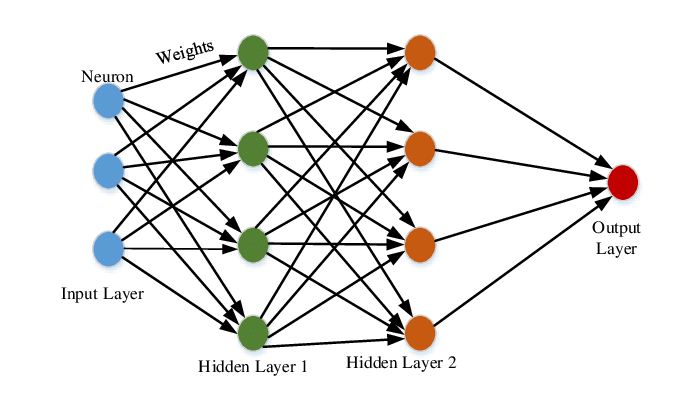

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function elementwise. For notational convience, we let $a^0 = x$, where $x$ is the current input data into our network. For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(s) = \frac{1}{1+e^{-s}}.
$$

For our cost function, we will use the Mean Squared Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

### About the MNIST Data Set

The MNIST data set consists of $70000$ images of hand written digits, $60000$ of which are typically used as labeled training examples, where the other $10000$ are used for testing your learning model on. The following picture represent a sample of some of the images.

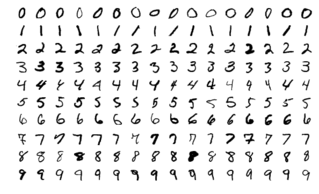

Each image in the MNIST data set is stored as a matrix.

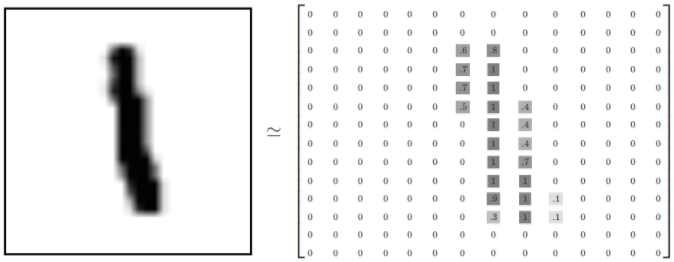

### Goal

To classify handwritten difits using the Multilayer Perceptron Learning algorithm based on the [MNIST data](https://en.wikipedia.org/wiki/MNIST_database).

### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [tensorflow](https://www.tensorflow.org/)

To load the MNIST data, we also need to import [keras.dataset](https://keras.io/api/datasets/).

In [1]:
# Import the necessaty libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

### Data Exploration and Data Wrangling

In [2]:
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
# Check the shape of the training set
train_X.shape

(60000, 28, 28)

In [4]:
# Check the shape of the first matrix in the training set
train_X[0].shape

(28, 28)

In [5]:
# Check the shape of the test set
test_X.shape

(10000, 28, 28)

The training set has $60000$ pictures with $28 \times 28$ pixel. The test set has $10000$ pictures with the same $28 \times 28$ pixel. 

Let's check the first data point in the training set.

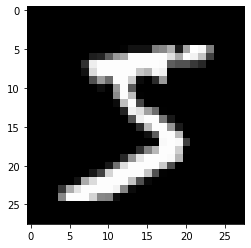

In [6]:
# Show the first matrix in the training set
plt.imshow(train_X[0], cmap="gray")

In [7]:
# Check the first label of the training set
train_y[0]

5

The matrix and the label match. 

So far, we have an overall impression about the MNIST dataset.

Then let's check the range of the grey scale ($x$) in the training matrics. If the range is big, we may need to scale it. 

In [8]:
np.max(train_X)

255

In [9]:
np.min(train_X)

0

In [10]:
np.max(test_X)

255

In [11]:
np.min(test_X)

0

The the range of the grey scale ($x$) is $(0, 255)$, and thus, we need to scale it down by dividing the maximun value.

In [12]:
# Scale down X
train_X = train_X/255
test_X = test_X/255

Then we need to reshape the input matrics ($X$) and output matrics ($y$) to a desire pattern that can fit our algorithm.

First, for the input matrics ($X$), we need to flatten the $28 \times 28$ matrix, and reshape it to a $784 \times 1$ vector.

In [13]:
# X will temp store flattened matrices
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

Second, for the output matrics ($y$), it is a single number, and we need to do the One Hot Encoding and represent it using a $10 \times 1$ vector. For example, 

$$y=5 \overset{\text {One Hot encode}}{\rightarrow} y =\begin{bmatrix}
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
1\\ 
0\\ 
0\\ 
0\\ 
0
\end{bmatrix}$$

In [14]:
# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

In [15]:
# Our data will be stored as a list of tuples
train_data = [p for p in zip(X, Y)]

So far, the "train_data" would have one column with the flattened $X$ vectors and the one column with the One Hot encoded label vectors. We can pick the first data point and print the One Hot encoded label and the original true value to check the transformation.

In [16]:
p = train_data[0]
print(p[1])
print(train_y[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
5


The transformation is correct! Then we can do the same thing on the test set.

In [17]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

---

### Build the Algorithm

To build the algorithm, there are several functions need to be defined.

#### Activation Function
We choose the sigmoid function as the activation function, 
$$\sigma(z)=\frac {1}{1+e^{-z}}$$
Derivation of the sigmoid function is 
$$\sigma'(z)=\frac {e^{-z}}{(1+e^{-z})^2}=\frac {1}{(1+e^{-z})}\frac {e^{-z}}{(1+e^{-z})}=\frac {1}{1+e^{-z}} \times \left ( 1- \frac {1}{1+e^{-z}}  \right )$$


In [18]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))

#### Loss Function
we use the Mean Sqaure Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

In [19]:
def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

#### The Function to Initialize the Weights and Bias

For our algorithm, we set up the number of nodes in the four layers to be $748$, $60$, $60$, and $10$, repectively. And thus, the dimemsions of the weights are ($60$, $784$), ($60$, $60$), ($10$, $60$), repectively, and the dimensions of the bias are ($60$, $1$), ($60$, $1$), ($10$, $1$), repectively. 

When intializing, scaling initializer is applied, which can speed up the algorithm. 

In [20]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]  #add weight_0, to match the shape
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])  #Scaling initializer to scale the shape
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

Let's test!

In [21]:
W, B = initialize_weights()

In [22]:
x, y = train_data[0]

First layer:

In [23]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [24]:
a1.shape

(60, 1)

The shape of the output of the first layer match the desire dimension.

Second layer:

In [25]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


The shape of the output of the second layer match the desire dimension.

And the third layer:

In [26]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


The shape of the output of the thired layer match the desire dimension.

These results suggest that the "innitialize_weights" function works well. And then, we can put the input and output of the layers together.

In [27]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

To check whether the loop works well, we can print the shape of the output of the layer before the last layer:

In [28]:
A[-1].shape

(10, 1)

The shape is correct! Let's move on!

#### Output Error

The output error is

$$\delta^{l-1}=\triangledown_{a^{l-1}}C \otimes \sigma'(z^{l-1})$$

In [29]:
# Measure the output error
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [30]:
deltas[L-1]

array([[ 0.14738227],
       [ 0.14611892],
       [ 0.13647339],
       [ 0.05845344],
       [ 0.13154166],
       [-0.14512047],
       [ 0.067298  ],
       [ 0.07474765],
       [ 0.09484313],
       [ 0.14498348]])

#### Neuron Error

According to the output error, for $l=L-2,...,1$, the neuron error is

$$\delta^{l}=\left ( (w^{l+1})^T a^{l+1} \right ) \otimes \sigma'(z^{l})$$

In [31]:
# calculate the neuron error
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

In [32]:
deltas[1].shape

(60, 1)

In [33]:
deltas[2].shape

(60, 1)

In [34]:
deltas[3].shape

(10, 1)

The dimensions of the outputs of the layers are all correctly, suggesting that the codes for the output error and the neuron error work correctly.

The gradient descent will be used to optimize the algorithm.

In [35]:
# Set the learning rate
alpha = 0.04

In [36]:
# To update the weights and bias
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

#### Feedforward Process

In [37]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

#### Store the Neuron Errors

In [38]:
def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

#### Average of Mean Squared Error

This is to evaluate the overall performance for each step (epoch/mini-batch depends on settings).

In [39]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)

---

### Implement the Algorithm

Before training, we first look at the initial cost and the performance.

In [40]:
# Calculate the initial cost
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 1.470911006477927


Predicted Value = 3
Actual Value = 4


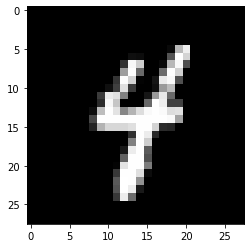

In [41]:
# Show the performance
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

The prediction is wrong. 

Next, we can train the model using Stochasitc Gradient Descent strategy.

#### Stochasitc Gradient Descent

First, we define a SGD function.

In [42]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

Let's train the model!

In [43]:
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 1.470911006477927
0 Cost = 0.07365786495349039
1 Cost = 0.052770969935092074
2 Cost = 0.041933450609303646


The costs of every epoch gradually decrease. The training process works well.

We can also take a look at one example.

Predicted Value = 8
Actual Value = 8


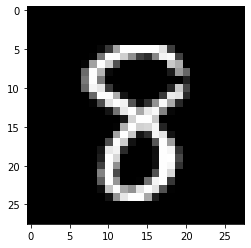

In [44]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

The prediction now is correct!

We can put all the functions together to make a class. In the meantime, we also define another strategy, **mini-batch gradient descent** to optimize the algorithm.


In [45]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

    
  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
        for j in range(0, data_length-batch_size, batch_size):
            delta_list = []
            A_list = []
            for p in data[j:j+batch_size]:
                A, deltas = self.deltas_dict(p)
                delta_list.append(deltas)
                A_list.append(A)
                
                for i in range(1, self.L):
                    self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
                    self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

Let's try our class!

We can also setup 60 nodes for both hidden layers.

In [46]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10])

To use the stochastic gradient descent strategy:

In [47]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.8565893382741554
2 Cost = 0.043475642325081706


To use the mini-batch gradient descent strategy:

In [48]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.043475642325081706
2 Cost = 0.03178593981295065


Compare these two strategy, the mini-batch gradient descent has a smaller cost than the stochastic gradient descent. 

Notably, the mini-batch gradient descent takes a longer time to compute.